In [ ]:
#Importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!rm -rf gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/'Skin cancer ISIC The International Skin Imaging Collaboration'/Train/*/output/*.jpg

This dataset has about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
train_path="gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_path="gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"



data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


2. Data Preparation

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

###Train Data Set Creation

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


Validation Data Set Creation

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


##Visualize the data

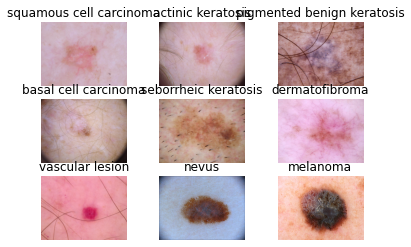

In [ ]:
import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(train_path)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model 0- Initial CNN without dropout

Creating a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
model=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
     
        
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
   
    Flatten(),
    Dense(128, activation='relu'),
    
    Dense(9, activation='softmax')
])

### Compiling the model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 686s 3s/step - loss: 2.3481 - accuracy: 0.3002 - val_loss: 1.6481 - val_accuracy: 0.4139
Epoch 2/20
56/56 [==============================] - 2s 36ms/step - loss: 1.5482 - accuracy: 0.4760 - val_loss: 1.5770 - val_accuracy: 0.4586
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.4017 - accuracy: 0.5179 - val_loss: 1.3969 - val_accuracy: 0.5324
Epoch 4/20
56/56 [==============================] - 2s 35ms/step - loss: 1.2427 - accuracy: 0.5608 - val_loss: 1.3336 - val_accuracy: 0.5638
Epoch 5/20
56/56 [==============================] - 2s 35ms/step - loss: 1.1062 - accuracy: 0.6110 - val_loss: 1.3647 - val_accuracy: 0.5638
Epoch 6/20
56/56 [==============================] - 2s 35ms/step - loss: 0.9957 - accuracy: 0.6507 - val_loss: 1.4408 - val_accuracy: 0.5459
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 0.8876 - accuracy: 0.6948 - val_loss: 1.4957 - val_accuracy: 0.5257
Epoch 8/20
56

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 129600)            0

### Visualizing training results


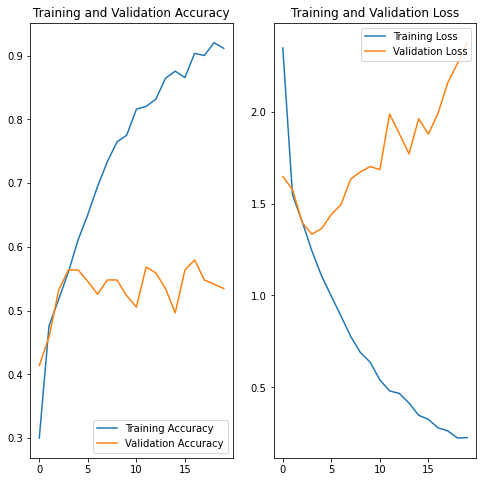

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- The accuracy of the model for the Training data set is at 89%. But the Validation accuracy is not in par with the training accuracy. It is only at 55%. The validation loss as observed is very high.
- This could also be indicative of some Overfit in the model.
- We can add some Dropout layers 
- And by adding a few more layers, we could improve the accuracy by trying to extract more features.

## Model 1 with dropout

### Creating the model

In [ ]:
model1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
   
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    
    Dense(9, activation='softmax')
])

### compiling the model

In [ ]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 42ms/step - loss: 5.2302 - accuracy: 0.1758 - val_loss: 2.1713 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 39ms/step - loss: 2.1482 - accuracy: 0.2182 - val_loss: 2.1339 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 2s 39ms/step - loss: 2.1016 - accuracy: 0.2076 - val_loss: 2.0534 - val_accuracy: 0.2260
Epoch 4/20
56/56 [==============================] - 2s 39ms/step - loss: 2.0544 - accuracy: 0.2176 - val_loss: 2.0274 - val_accuracy: 0.2148
Epoch 5/20
56/56 [==============================] - 2s 39ms/step - loss: 2.0331 - accuracy: 0.2165 - val_loss: 2.0330 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 2s 39ms/step - loss: 1.9277 - accuracy: 0.2874 - val_loss: 1.9048 - val_accuracy: 0.3758
Epoch 7/20
56/56 [==============================] - 2s 39ms/step - loss: 1.8532 - accuracy: 0.3248 - val_loss: 1.7926 - val_accuracy: 0.3736
Epoch 8/20
56

### Visualising the model results

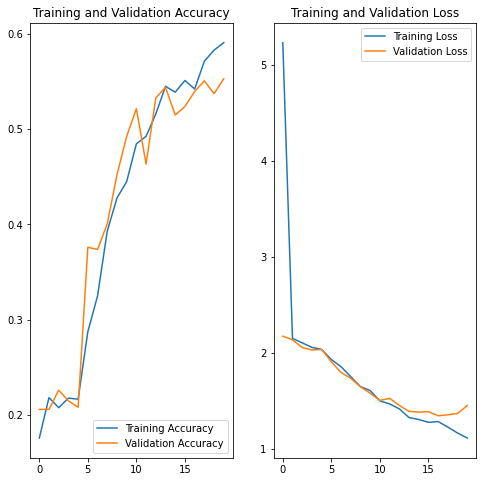

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Observations
- The model accuracy for Train data set has dropped to nearly 60%.
- The accuracy for the Validation set is at 56%.
- Clearly the model is underfit with dropout


## Model 2 with adding few more layers

### Creating the Model

In [ ]:
model_update=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(16,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(16,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),

    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),   
    Dense(9, activation='softmax')
])

### Compiling the model

In [ ]:
model_update.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_update.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 62ms/step - loss: 2.0500 - accuracy: 0.1808 - val_loss: 2.0173 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 54ms/step - loss: 2.0127 - accuracy: 0.2109 - val_loss: 1.9742 - val_accuracy: 0.2506
Epoch 3/20
56/56 [==============================] - 3s 54ms/step - loss: 2.0153 - accuracy: 0.2366 - val_loss: 1.8692 - val_accuracy: 0.3557
Epoch 4/20
56/56 [==============================] - 3s 56ms/step - loss: 1.9428 - accuracy: 0.2824 - val_loss: 1.8916 - val_accuracy: 0.2752
Epoch 5/20
56/56 [==============================] - 3s 55ms/step - loss: 1.7806 - accuracy: 0.3371 - val_loss: 1.6886 - val_accuracy: 0.3893
Epoch 6/20
56/56 [==============================] - 3s 55ms/step - loss: 1.6709 - accuracy: 0.3694 - val_loss: 1.7899 - val_accuracy: 0.3445
Epoch 7/20
56/56 [==============================] - 3s 56ms/step - loss: 1.6398 - accuracy: 0.3990 - val_loss: 1.5566 - val_accuracy: 0.4519
Epoch 8/20
56

### Visualizing the results

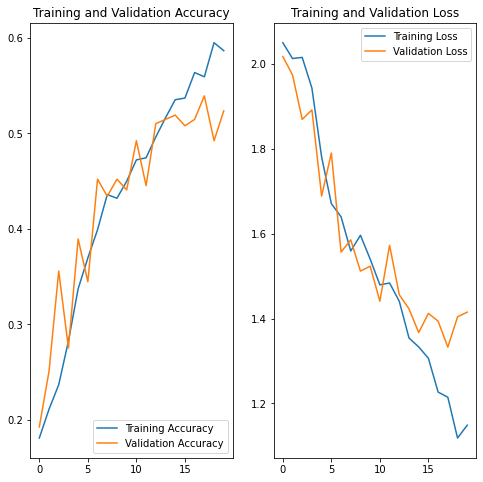

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- Adding more convolutional layers does not seem to be helping in improving metrics.

## Data Augmentation
#### Specifying the Augmentation


In [ ]:
#Data Augmentation
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomZoom(0.2,0.2),
  layers.experimental.preprocessing.RandomRotation(0.2)
])

###Visualizing the Augmented Data

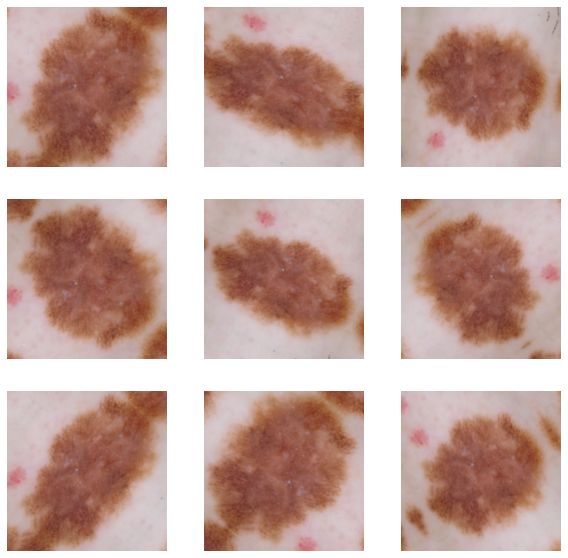

In [ ]:
image, label = next(iter(train_ds))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

## Model 3 with data Augmentation layer

In [ ]:
model_augmented=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         

    data_augmentation,

    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
   
    
    #Conv2D(128,(3,3),activation='relu',padding='same'),
    #Conv2D(128,(3,3),activation='relu'),
    #MaxPooling2D(pool_size=(2,2)),
    
    
    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.2),   
    Dense(9, activation='softmax')
])

### Compiling the model

In [ ]:
model_augmented.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 89ms/step - loss: 2.0523 - accuracy: 0.2578 - val_loss: 1.9524 - val_accuracy: 0.2528
Epoch 2/20
56/56 [==============================] - 5s 80ms/step - loss: 1.7001 - accuracy: 0.3934 - val_loss: 1.5772 - val_accuracy: 0.4116
Epoch 3/20
56/56 [==============================] - 4s 80ms/step - loss: 1.6689 - accuracy: 0.4023 - val_loss: 1.5855 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 5s 81ms/step - loss: 1.5641 - accuracy: 0.4475 - val_loss: 1.4412 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4839 - accuracy: 0.4794 - val_loss: 1.4781 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4232 - accuracy: 0.5000 - val_loss: 1.3826 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.4796 - accuracy: 0.4821 - val_loss: 1.3595 - val_accuracy: 0.5145
Epoch 8/20
56

### Visualizing the results

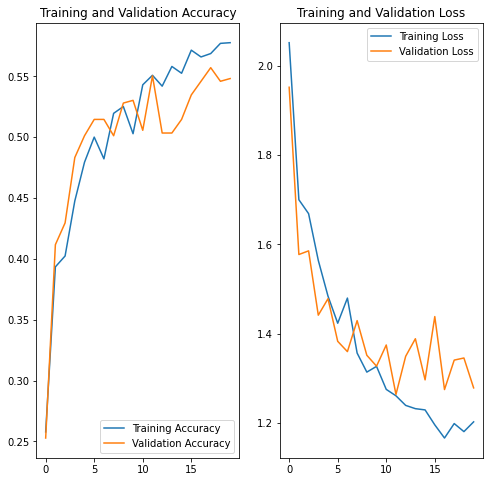

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations

- The model accuracy for Train data is nearly 58%.
- The accuracy for the Validation set is also at 58%.
- Model is underfit clearly with less accuracy on train data
- Adding augumentation layer on the fly is not helping in improving metrics

### Checking for Class Imbalance

In [ ]:
for i in class_names:
    directory =train_path+'/'+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


### Observation

- The samples of various classes are not in equal proportion.
- There is a significant Class Imbalance observed.
- The class with the least number of samples is Seborrheic Keratosis with 77.
- The class that dominates the data in terms of proportionate number of samples is Pigmented Benign Keratosis with sample size of 462.

### Using Augmentor for Class Imbalance Treatment

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [ ]:
path_to_training_dataset=train_path +'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE0707CE990>: 100%|██████████| 500/500 [00:20<00:00, 24.25 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE19E0F4710>: 100%|██████████| 500/500 [00:26<00:00, 18.80 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE07071B690>: 100%|██████████| 500/500 [00:21<00:00, 23.24 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE108971850>: 100%|██████████| 500/500 [01:31<00:00,  5.45 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x7FE0726BB890>: 100%|██████████| 500/500 [01:21<00:00,  6.11 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE106376110>: 100%|██████████| 500/500 [00:18<00:00, 26.81 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE072AFDED0>: 100%|██████████| 500/500 [00:42<00:00, 11.87 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE1064EBCD0>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE072AC7050>: 100%|██████████| 500/500 [00:20<00:00, 24.27 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
data_dir_train

PosixPath('gdrive/MyDrive/Deeplearning/Melonoma_detection/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
for i in class_names:
    directory =train_path+'/'+ i+'/'
    directory_out =train_path+'/'+i+'/output/'
    #print(directory_out)
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


### Observations
- The Augmentor has helped decrease the imbalance in class images and that can be viewed from above.

## Modelling Augmented Data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

### Creating the Train Data Set

In [ ]:
data_dir_train=train_path+'/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Creating the Validation Data Set

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


## Model 4 with Augumentation

## Final Model

In [ ]:
model_final1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.15),
    

    Conv2D(64,(3,3),activation='relu',padding='same'),
    #BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.15),
    
  

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [ ]:
model_final1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model_final1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 33s 186ms/step - loss: 2.3634 - accuracy: 0.2170 - val_loss: 1.7826 - val_accuracy: 0.3660
Epoch 2/30
169/169 [==============================] - 33s 187ms/step - loss: 1.5827 - accuracy: 0.3993 - val_loss: 1.5205 - val_accuracy: 0.4588
Epoch 3/30
169/169 [==============================] - 33s 186ms/step - loss: 1.4065 - accuracy: 0.4798 - val_loss: 1.3205 - val_accuracy: 0.5182
Epoch 4/30
169/169 [==============================] - 33s 187ms/step - loss: 1.2492 - accuracy: 0.5315 - val_loss: 1.3654 - val_accuracy: 0.5100
Epoch 5/30
169/169 [==============================] - 32s 184ms/step - loss: 1.1424 - accuracy: 0.5825 - val_loss: 1.1679 - val_accuracy: 0.5783
Epoch 6/30
169/169 [==============================] - 32s 185ms/step - loss: 1.0467 - accuracy: 0.6107 - val_loss: 1.0676 - val_accuracy: 0.6065
Epoch 7/30
169/169 [==============================] - 32s 184ms/step - loss: 0.9339 - accuracy: 0.6526 - val_loss: 0.9727 - val_ac

### Visualizing the model results

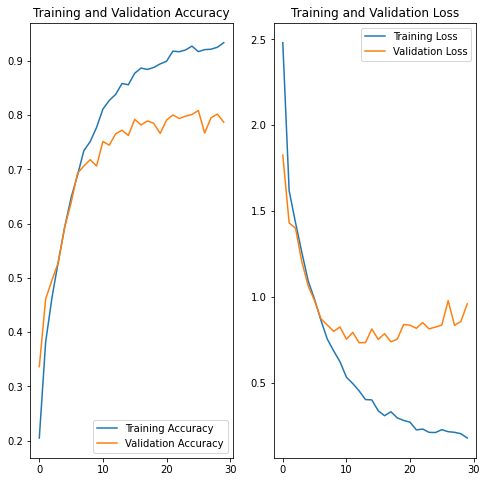

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- The training accuracy seems to be nearly ~90%.
- The validation accuracy is nearly ~82%.
- Model accuracy has improved, the class rebalance has helped treat the overfitting(model 1) and underfitting(model2)
